In [1]:
import os
import sys
import pandas as pd
import numpy as np
from solutionguidance.cslib import fetch_data
import seaborn as sns

# IBM AI Enterprise Workflow Capstone
## Introduction
The Capstone case study is to combine the learnings from all the modules of the specialisation and use it in solving a real world problem. AAVAIL launched using a tiered, subscription-based service which showed promise, but conversations with users, especially those outside of US markets, prompted an experiment using an à la carte approach. This experiment was carried out mostly outside of the US and there are now a couple of years of data with a few thousand active users. The data are transaction-level purchases across 38 different countries and are invoiced in batches. Management has nearly decided to make the switch to the new model, but they find it difficult to predict monthly revenue. They have asked you to create a service that, at any point in time, will predict the revenue for the following month. They have also asked that the service be given the ability to project revenue for a specific country. To keep the development time reasonable you have been advised to limit your model to the ten countries with the most revenue.

### PART 1: Data Investigation
1. Assimilate the business scenario and articulate testable hypotheses.

2. State the ideal data to address the business opportunity and clarify the rationale for needing specific data.

3. Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

4. Investigate the relationship between the relevant data, the target and the business metric.

5. Articulate your findings using a deliverable with visualizations.

In [2]:
DATA_DIR = os.path.join('.', 'cs-train')
train_df = fetch_data(DATA_DIR)
train_df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,13085.0,28,489434,11,6.95,85048,12,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.65,22064,17,2017,2017-11-28


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815011 entries, 0 to 815010
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       815011 non-null  object        
 1   customer_id   625249 non-null  float64       
 2   day           815011 non-null  int64         
 3   invoice       815011 non-null  object        
 4   month         815011 non-null  int64         
 5   price         815011 non-null  float64       
 6   stream_id     815011 non-null  object        
 7   times_viewed  815011 non-null  int64         
 8   year          815011 non-null  int64         
 9   invoice_date  815011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 62.2+ MB


### Hypotheses
The customer's revenue can be predicted based on its previous behaviour.

Generate operation_period_id based on month and year

In [4]:
train_df['operation_period_id'] = pd.to_datetime(
    train_df.year.astype(str) + (train_df.month.astype(str).str.zfill(2))+'01',
    format='%Y%m%d'
)

In [39]:
revenue_by_country = train_df[['operation_period_id','country', 'price']].groupby(['operation_period_id', 'country']).sum()

In [44]:
sns.set(rc={'figure.figsize':(23.4,16.54)})

<AxesSubplot:xlabel='operation_period_id', ylabel='price'>

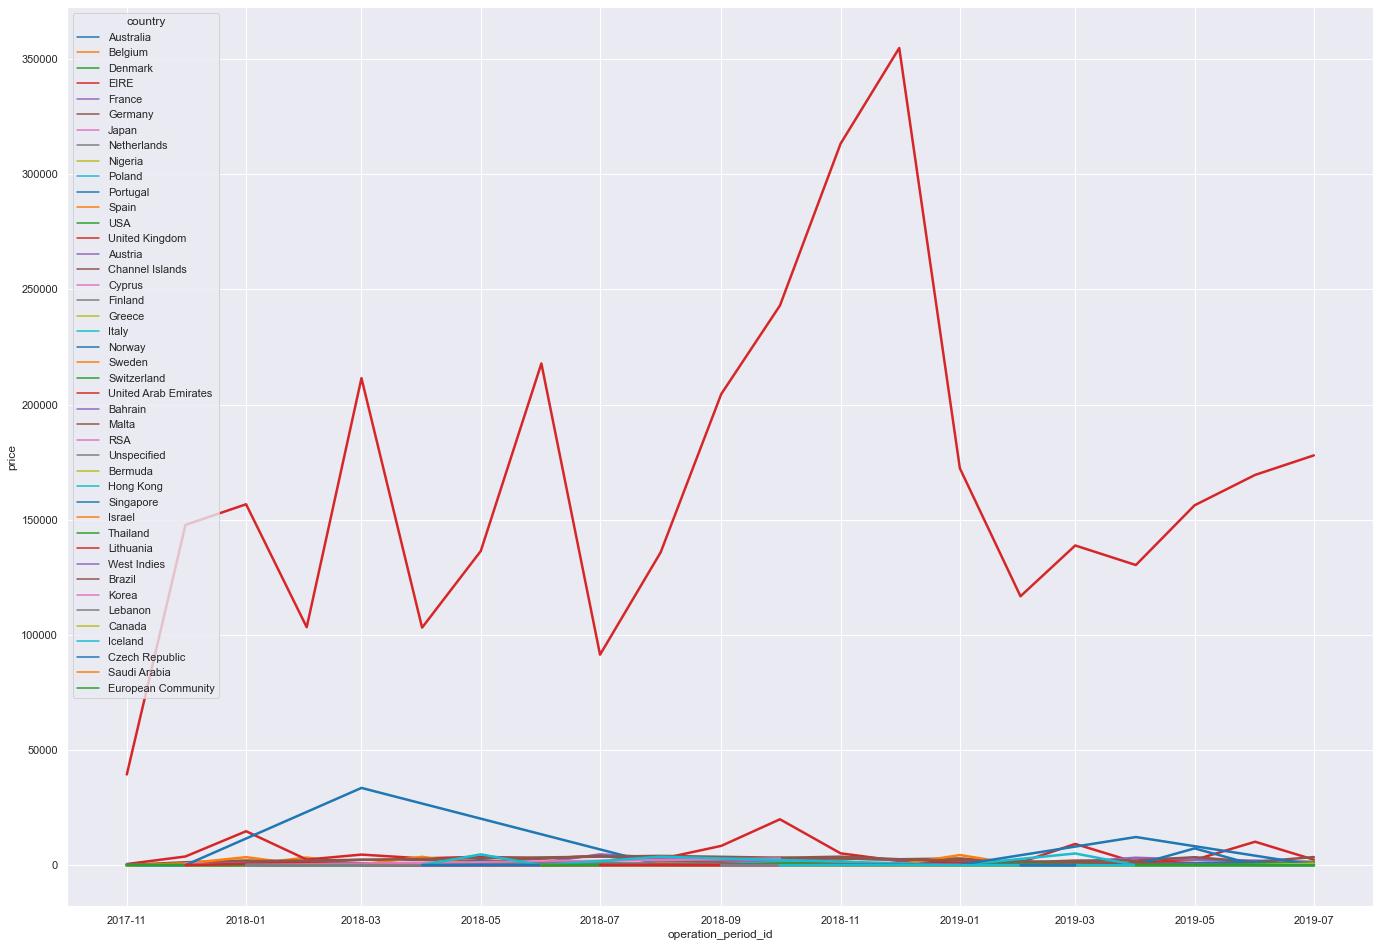

In [45]:
sns.lineplot(data=revenue_by_country, palette="tab10", linewidth=2.5,x ='operation_period_id', y ='price',hue ='country', dashes=False, markers=True)

Clearly exists only one country with high revenue compared with the others.
Next are shown only top 10 revenue country

In [63]:
top_countries = train_df[['country', 'price']].groupby('country').sum()
top_countries.reset_index(inplace=True)
top_countries.sort_values(['price'], ascending=False, inplace=True, ignore_index=True)

In [67]:
top_countries_names = list(top_countries['country'])[0:10]

In [68]:
top_countries

,country,price
0,United Kingdom,3.521514e+06
1,EIRE,1.070692e+05
2,Germany,4.927182e+04
3,France,4.056514e+04
4,Norway,3.849475e+04
5,Spain,1.604099e+04
6,Hong Kong,1.445257e+04
7,Portugal,1.352867e+04
8,Singapore,1.317592e+04
9,Netherlands,1.232280e+04


In [69]:
top_countries_names

['United Kingdom',
 'EIRE',
 'Germany',
 'France',
 'Norway',
 'Spain',
 'Hong Kong',
 'Portugal',
 'Singapore',
 'Netherlands']

In [87]:
top_revenue_countries = revenue_by_country[revenue_by_country.index.get_level_values('country').isin(top_countries_names)]

In [89]:
top_revenue_countries

price
operation_period_id country                   
2017-11-01          EIRE               570.210
                    France             352.420
                    Germany            156.480
                    Netherlands         49.330
                    Portugal           208.750
...                                        ...
2019-07-01          Norway             168.630
                    Portugal           201.460
                    Singapore          230.460
                    Spain              647.630
                    United Kingdom  177961.861

[173 rows x 1 columns]

<AxesSubplot:xlabel='operation_period_id', ylabel='price'>

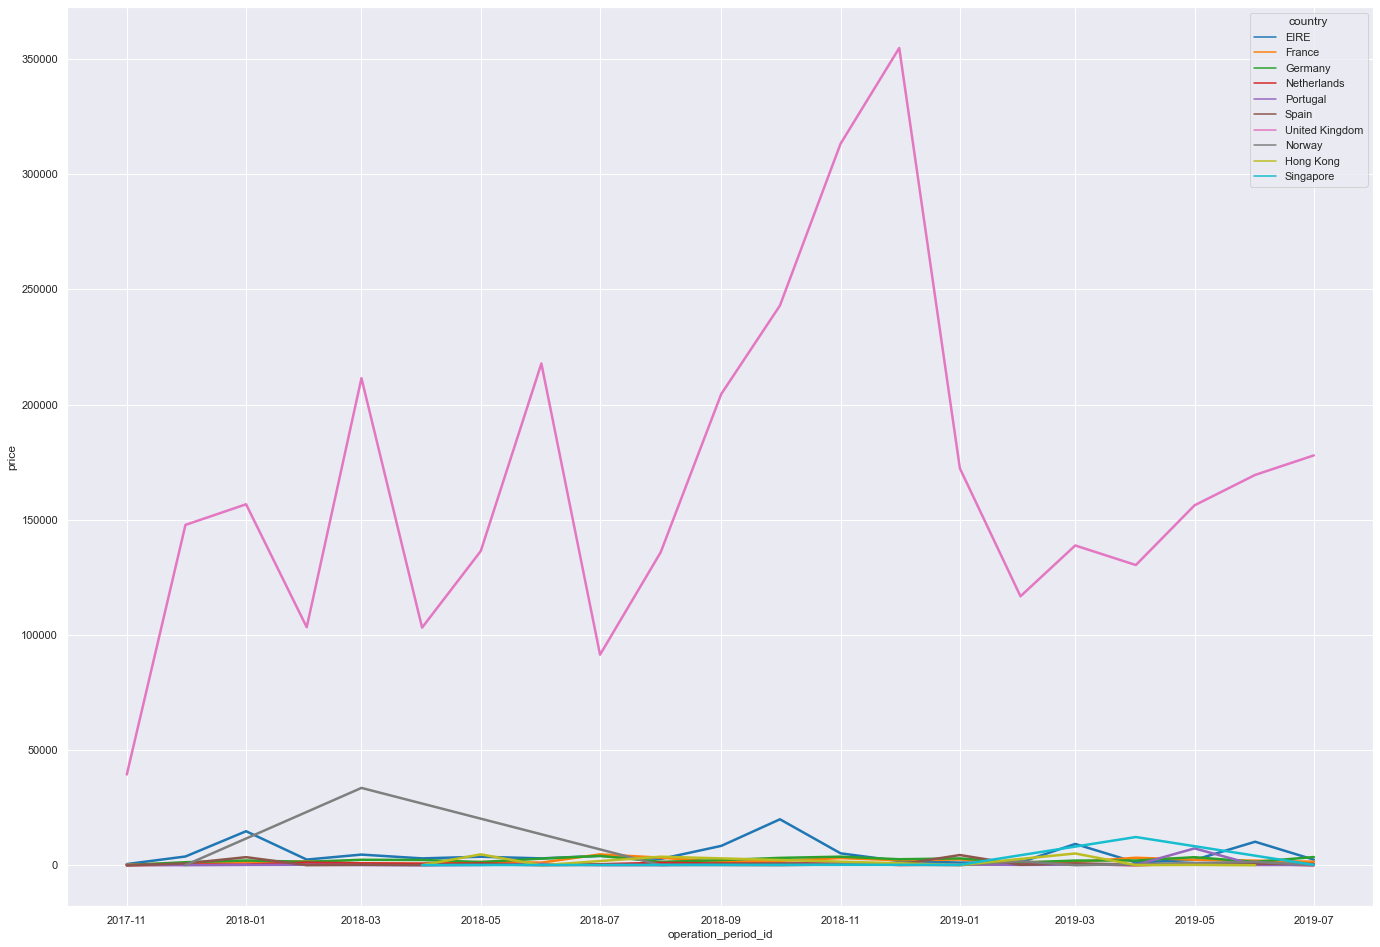

In [90]:
sns.lineplot(data=top_revenue_countries.filter(items=top_revenue_countries, axis=1), palette="tab10", linewidth=2.5,x ='operation_period_id', y ='price',hue ='country', dashes=False, markers=True)

Calculating time span of the data.

In [9]:
timeDelta = train_df['operation_period_id'].max()-train_df['operation_period_id'].min()

In [10]:
timeDelta

Timedelta('607 days 00:00:00')

In [11]:
train_df['invoice_date'].max()-train_df['invoice_date'].min()

Timedelta('610 days 00:00:00')

In [12]:
len(train_df['invoice_date'].unique())

495